In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
## Import Some Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
## Divide dataset in to dependent and Independent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## feature Engineering Part
geography=pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender=pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [ ]:
## Concatinating with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
## Splitting the Dataset into Training and testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
## PART-2 Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## Intialize the ANN
classifier=Sequential()

In [ ]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Adding the Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8646 - loss: 0.3186 - val_accuracy: 0.8459 - val_loss: 0.3980
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8679 - loss: 0.3110 - val_accuracy: 0.8432 - val_loss: 0.3880
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3113 - val_accuracy: 0.8448 - val_loss: 0.3841
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8681 - loss: 0.3147 - val_accuracy: 0.8455 - val_loss: 0.3828
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8688 - loss: 0.3137 - val_accuracy: 0.8455 - val_loss: 0.3975
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3112 - val_accuracy: 0.8391 - val_loss: 0.4075
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8714 - loss: 0.3057 - val_accuracy: 0.8417 - val_loss: 0.3935
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8697 - loss: 0.3175 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

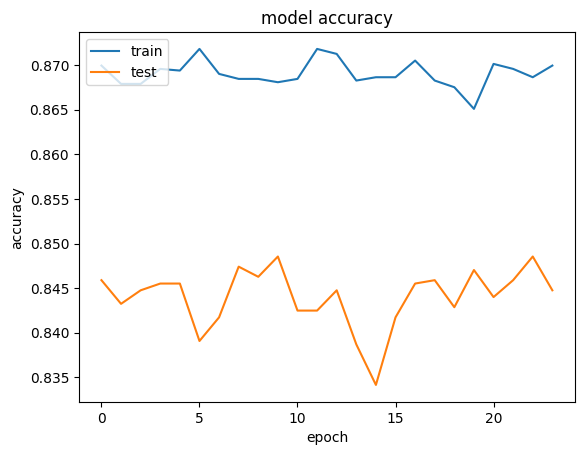

In [ ]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

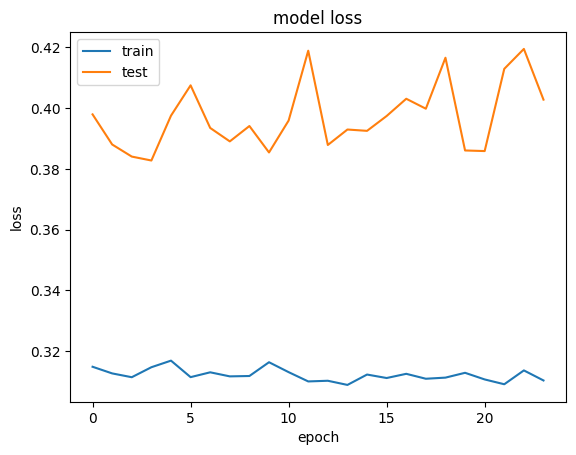

In [ ]:
# Sumamrize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# part-3 Making predictions and Evaluating the Model

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
# Make the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1521,   74],
       [ 209,  196]])

In [ ]:
# Calculating the Accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8585

In [ ]:
# Get the weights

classifier.get_weights()

[array([[-1.124819  ,  0.06594814,  0.74003583,  3.932504  , -0.58765256,
         -1.0820513 , -2.1845467 ,  2.1720712 , -0.45068002, -1.6412548 ,
         -0.9856967 ],
        [ 6.618459  ,  4.1304116 , -1.0114731 , -0.94747066,  1.1522211 ,
          4.4457707 , -2.6100025 , -1.8870982 ,  4.924392  , -1.0948093 ,
          1.6191949 ],
        [ 0.34030524, -1.6308372 ,  1.4524549 ,  0.5504852 ,  1.0712795 ,
         -1.8627006 ,  1.9302526 ,  1.6632595 ,  1.5641531 ,  0.77503556,
         -1.0831648 ],
        [ 1.0627824 ,  2.769978  , -3.0444193 , -0.14352272, -5.806319  ,
         -1.1813785 ,  3.004282  , -4.4729896 , -1.367186  , -1.2244775 ,
          2.2737377 ],
        [-2.9354236 ,  3.0807624 ,  6.0223136 ,  1.2050592 , -1.5521241 ,
         -0.85634965,  0.7808609 , -1.1544472 ,  4.056064  , -1.070296  ,
          7.2991586 ],
        [-0.55328965, -2.3048778 ,  0.47789747,  2.5198178 ,  0.06296052,
         -0.11301491, -1.6292843 , -1.6837813 ,  0.43916047, -0.9202032